In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_excel('D:\\OLAP\\Coffee Data.xlsx') 
df = df[['Order Date', 'Amount']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df = df.groupby('Order Date')['Amount'].sum().reset_index()

# Normalize the 'Amount' column
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(np.array(df['Amount']).reshape(-1, 1))

# Splitting the data
train_size = int(len(df) * 0.7)
train_data = y[0:train_size, :]
test_data = y[train_size:len(df), :]
train_dates = df['Order Date'][0:train_size]
test_dates = df['Order Date'][train_size:len(df)]

array([[2.01215766e-01],
       [1.32551551e-01],
       [4.72278508e-02],
       [2.00051345e-01],
       [1.71399232e-01],
       [1.20971513e-01],
       [9.04123154e-02],
       [6.93426976e-02],
       [1.70234810e-01],
       [1.69464641e-01],
       [9.31079061e-02],
       [1.14150018e-02],
       [1.03670221e-01],
       [4.43122118e-02],
       [3.86734759e-02],
       [2.13547636e-01],
       [4.92357908e-03],
       [4.25701633e-02],
       [1.37557648e-01],
       [9.59318584e-02],
       [1.04312028e-01],
       [6.02382022e-03],
       [2.81423345e-01],
       [2.02196815e-01],
       [7.05713002e-02],
       [9.32454363e-03],
       [1.46937204e-01],
       [2.13547636e-01],
       [2.53165485e-01],
       [2.40540218e-01],
       [8.44435072e-03],
       [9.84715817e-03],
       [6.48317089e-02],
       [8.22705310e-02],
       [3.78207891e-02],
       [1.76570365e-01],
       [3.35381004e-01],
       [9.51616896e-02],
       [1.04312028e-01],
       [1.62964050e-01],


In [2]:
# Prepare data for LSTM 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [4]:
# Build and train the LSTM model 
model = Sequential()
model.add(LSTM(50, input_shape=(time_step, 1)))  
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1) 

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0212
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0095
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0112
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0112
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0112
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0107
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0126
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0116
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0102
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0120
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0108
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0113
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0115
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0123
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0102
Epoch 16/200
6/6 ━━

In [5]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [6]:
# Future predictions with LSTM (No change here)
future_dates = pd.date_range(start=df['Order Date'].max() + pd.Timedelta(days=1), periods=365, freq='D')
x_input = test_data[-time_step:].reshape(1, time_step, 1)  # Use test data for future predictions
future_predictions_lstm = []

for _ in range(365):
    y_pred_future = model.predict(x_input, verbose=0)
    future_predictions_lstm.append(y_pred_future[0, 0])
    x_input = np.append(x_input[:, 1:, :], y_pred_future.reshape(1, 1, 1), axis=1)

future_predictions_lstm = scaler.inverse_transform(np.array(future_predictions_lstm).reshape(-1, 1))

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
mape = np.mean(np.abs((y_test - test_predict) / y_test[y_test != 0])) * 100

print('Test MSE:', mse)
print('Test RMSE:', rmse)
print('Test MAE:', mae)
print('Test MAPE:', mape)

Test MSE: 3438.0349962085543
Test RMSE: 58.6347592832831
Test MAE: 44.8813953025386
Test MAPE: 190.10704618441812


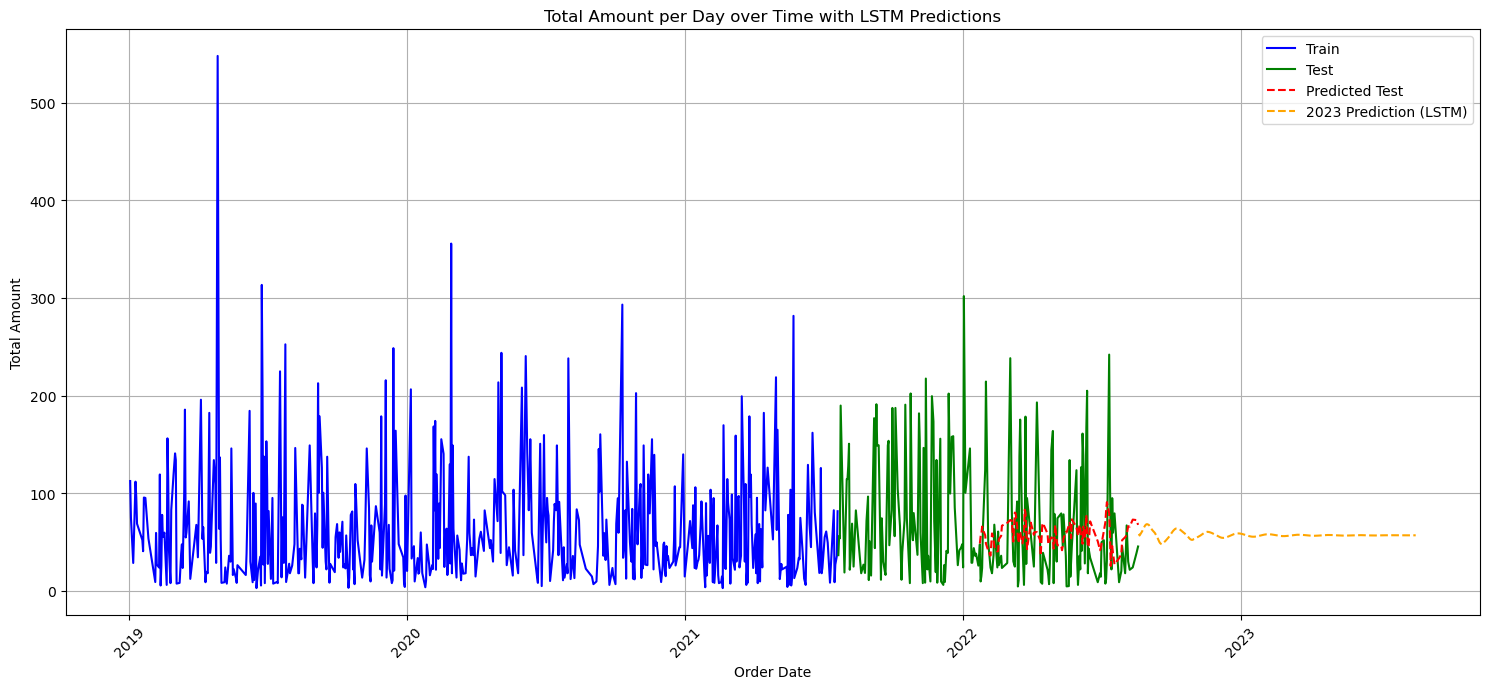

In [8]:
# Plotting (Corrected and more robust)
plt.figure(figsize=(15, 7))

plt.plot_date(train_dates, df['Amount'][0:train_size], fmt='-', label='Train', color='blue', marker=None)
plt.plot_date(test_dates, df['Amount'][train_size:len(df)], fmt='-', label='Test', color='green', marker=None)


# Calculate CORRECT plotting dates for test predictions (Adjusted)
test_predict_plot_dates = test_dates[time_step+1:len(test_dates)]   # Adjusted end index (-2)

plt.plot_date(test_predict_plot_dates, test_predict, fmt='--', label='Predicted Test', color='red', marker=None) 

plt.plot_date(future_dates, future_predictions_lstm, fmt='--', label='2023 Prediction (LSTM)', color='orange', marker=None)
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day over Time with LSTM Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()